### In the Name of God

#### Narges Gholami 810198447

#### AI CA5 phase1

<div style="direction:rtl"> نام پروژه: شبکه عصبی feed forward</div>

<div style="direction:rtl"> هدف پروژه : پیاده سازی شبکه feed forward  </div>

<div style="direction:rtl"> توضیح پروژه: در این پروژه در صدد آموزش یک شبکه عصبی با استفاده از الگوریتم feed forward هستیم و برای آموزش بهتر این شبکه از هایپرپارامترهای مختلف کمک میگیریم و تاثیر آن ها را بررسی می نماییم. به عنوان ورودی یک مجموعه عکس داریم که آن ها را به دو بخش تست و ترین تقسیم کرده وشبکه را روی آن ها پیاده سازی میکنیم. </div>

import libraries

In [2]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split 

load data and preprocess

In [3]:
data = pd.read_csv('cifar_dataset\labels.csv')
animalData = pd.DataFrame(data)

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

ax = []
for i in range(len(animalData)):
    addr = "cifar_dataset/data/" + str(animalData.iloc[i]['id']) +".png"
    img = mpimg.imread(addr)
    gray = np.array(rgb2gray(img))
    flattexAx = gray.flatten()
    ax.append(flattexAx)

ax = np.array(ax)

<div style="direction:rtl"> در این بخش داده لود می شود و سپس عکس ها در قالب یک آرایه سه بعدی خوانده میشود و سپس عکس ها سیاه و سفید میشوند. ما در این مرحله سیاه و سفید شده ی عکس ها را که یک آرایه دو بعدی 32 در 32 است به یک آرایه یک بعدی 1024 تایی تبدیل میکنیم و سپس در داده ساختار ax ذخیره مینماییم.</div>

In [4]:
X_train, X_test, y_train, y_test = train_test_split(animalData, animalData['label'], test_size= 0.3)
ax_columns = X_train.index
ax_train = ax[ax_columns] 
ax_train_df = pd.DataFrame(ax_train)
ax_columns = X_test.index
ax_test = ax[ax_columns] 
ax_test_df = pd.DataFrame(ax_test)

ax_y_train = y_train.reset_index()
del ax_y_train['index']

ax_y_test = y_test.reset_index()
del ax_y_test['index']

<div style="direction:rtl"> در این بخش داده ها به دو بخش تست و ترین تقسیم می شوند.x ها عملا پیکسل های عکس ها میباشد و y لیبل ها میباشد. </div>

In [6]:
ax_test_df

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.453996,0.500208,0.551588,0.566616,0.548722,0.500773,0.386937,0.401227,0.442271,0.475322,...,0.557149,0.507506,0.439969,0.478231,0.555671,0.548549,0.434843,0.492000,0.561796,0.571047
1,0.599318,0.688051,0.763404,0.780212,0.710243,0.638926,0.749686,0.738651,0.673016,0.651518,...,0.700086,0.688012,0.674200,0.658000,0.623298,0.574784,0.534914,0.352325,0.283616,0.474282
2,0.418471,0.406353,0.414431,0.414431,0.406353,0.422510,0.430024,0.433498,0.431196,0.435235,...,0.322180,0.308890,0.289259,0.300247,0.305459,0.262157,0.267326,0.251733,0.242482,0.263286
3,0.642576,0.641404,0.655259,0.657561,0.654651,0.663251,0.674804,0.667333,0.662729,0.665639,...,0.578729,0.580467,0.580467,0.568349,0.556839,0.560922,0.565526,0.567827,0.560922,0.559749
4,0.560153,0.400235,0.385859,0.560369,0.743043,0.767537,0.702780,0.703173,0.710557,0.681110,...,0.545165,0.546902,0.545165,0.526706,0.544078,0.592851,0.597455,0.623169,0.536392,0.471635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1.013451,1.004071,0.971929,0.655824,0.469016,0.446475,0.730180,0.634498,0.543114,0.597796,...,0.760671,0.346063,0.163992,0.252333,0.525133,0.637188,0.442435,0.309271,0.263667,0.239867
2996,0.111624,0.065235,0.055984,0.035745,0.033443,0.037482,0.033443,0.037482,0.041522,0.033443,...,0.591675,0.751463,0.759020,0.659212,0.588678,0.470847,0.359357,0.335471,0.274796,0.330953
2997,0.318537,0.326180,0.250129,0.355192,0.406573,0.486227,0.560020,0.639459,0.588773,0.557153,...,0.092945,0.074443,0.029969,0.005820,0.085082,0.469933,0.715890,0.754894,0.231882,0.163651
2998,0.259063,0.273004,0.288726,0.286467,0.276043,0.264447,0.249420,0.226749,0.205902,0.194784,...,0.161569,0.121176,0.109059,0.072706,0.064627,0.068667,0.072706,0.084824,0.076745,0.072706


In [7]:
ax_y_test

,label
0,horse
1,cat
2,horse
3,cat
4,cat
...,...
2995,cat
2996,cat
2997,cat
2998,cat


### part 1

first section

13 234
0.03529412 0.972549


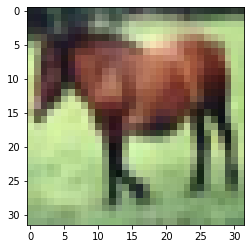

In [8]:
img = mpimg.imread("cifar_dataset/data/8.png")
imgplot = plt.imshow(img)

img2 = cv2.imread("cifar_dataset/data/8.png",0)
print(np.amin(img2), np.amax(img2))
print(np.amin(img), np.amax(img))

<div style="direction:rtl"> در خط 1 یک عکس با تابع mpimg.imread  خوانده می‌شود و خروجی آن آرایه‌ای از پیکسل‌هاست که مقدار آن بین 0 و یک است . از طرفی در خط شماره 4 با تابع cv2.imread عکس خوانده می‌شود و خروجی آن یک آرایه است که مقادیر آن بین 0 تا 255 است. </div>

<div style="direction:rtl"> خروجی، بازه‌ی پیکسل‌ها را نشان می‌دهد که بین 13 و 234 هستند. </div>

second section

Text(0.5, 1.0, 'horese')

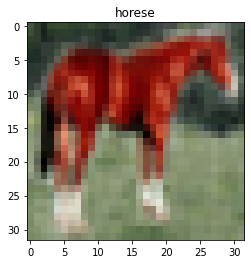

In [8]:
img3 = mpimg.imread( "cifar_dataset/data/17041.png")
imgplot = plt.imshow(img3)
plt.title("horese")

Text(0.5, 1.0, 'cat')

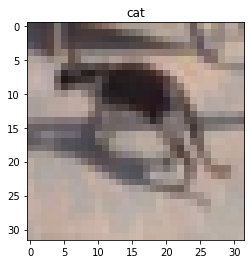

In [9]:
img4 = mpimg.imread("cifar_dataset/data/21545.png")
imgplot = plt.imshow(img4)
plt.title("cat")

<div style="direction:rtl"> ابتدا از داده‌های train یک آیدی انتخاب می‌شود. و عکس مربوط به آن همراه با نوع آن چاپ می‌شود. </div>

third section

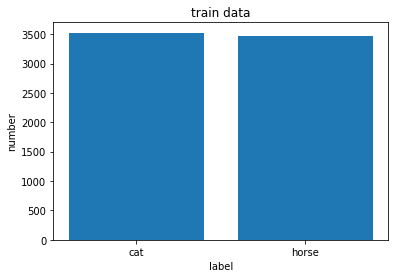

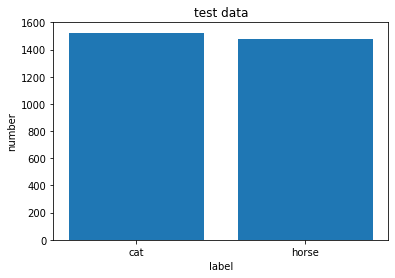

Number of horses in x train  3476
Number of horses in x test  1476
Number of cats in x train  3524
Number of cats in x test  1524


In [9]:
trainNum = {}
trainNum['cat'] = len(X_train[X_train['label'] == 'cat'])
trainNum['horse'] = len(X_train[X_train['label'] == 'horse'])

testNum = {}
testNum['cat'] =  len(X_test[X_test['label'] == 'horse'])
testNum['horse'] = len(X_test[X_test['label'] == 'cat'])


plt.bar(range(len(trainNum)), list(trainNum.values()), align='center')
plt.xticks(range(len(trainNum)), list(trainNum.keys()))
plt.ylabel("number")
plt.xlabel("label")
plt.title("train data")
plt.show()

plt.bar(range(len(testNum)), list(testNum.values()), align='center')
plt.xticks(range(len(testNum)), list(testNum.keys()))
plt.ylabel("number")
plt.xlabel("label")
plt.title("test data")
plt.show()

print("Number of horses in x train ", trainNum['horse'])
print("Number of horses in x test ", testNum['horse'])
print("Number of cats in x train ", trainNum['cat'])
print("Number of cats in x test ", testNum['cat'])

<div style="direction:rtl"> در این بخش تعداد داده های اسب و گربه در هر کدام از داده های تست و ترین در نمودار نمایش داده شده است. </div>

last section of part 1

<div style="direction:rtl">  خروجی تابع mpimg.imread پیکسلهای نرمالایز شده میباشد</div>

<div style="direction:rtl"> •	Scale کردن داده‌ها و دلیل این کار:
یک شبکه عصبی را تصور کنید که این شبکه، خود وزن‌های خود را یاد می‌گیرد. این شبکه با استفاده از داده‌های آموزشی و افزودن مداوم بردارهای خطای گرادیان ضرب در نرخ یادگیری ازbackpropagation   محاسبه می‌شود. «ضرب در نرخ یادگیری»علتی است که ما از اسکیلینگ استفاده می‌کنیم. اگر ما ورودی خود را اسکیل نکنیم، محدوده توزیع مقادیر ویژگی‌های ما احتمالاً برای هر ویژگی متفاوت می‌شود و میزان تغییراتش بیشتر از حدی می‌شود که ما توقعش را داریم.  بنابراین ما سعی می‌کنیم قبل از استفاده از آنها تصاویر را نرمالایز کنیم تا میزان تغییرات معقول باشد و بتوانیم به خوبی از داده‌ها برای آموزش شبکه خود استفاده بکنیم.
 </div>

### part 2

# Dataloader

In [10]:
class Dataloader:    
    def __init__(self, data, labels, n_classes, batch_size=None, shuffle=False):
        assert len(data)==len(labels)
        self.__n_classes = n_classes
        self.__batch_size = batch_size
        self.__shuffle = shuffle
        self.__data = data
        self.__onehot_labels = self.__onehot(labels, self.__n_classes)
    
    def __onehot(self, labels, n_classes):
        onehot_vectors = [[0]*n_classes for _ in range(len(labels))]

        n = n_classes
        index = 0
        l = {}
        for i in range(len(labels)):
            if not n:
                break
            if labels.iloc[i][0] not in l.keys():
                l[labels.iloc[i][0]] = index
                index += 1
                n -= 1

        j = 0
        for i in range(len(labels)):
            onehot_vectors[j][l[labels.iloc[i][0]]] = 1
            j += 1
            
        return onehot_vectors
    
    def __shuffle_dataset(self):
        p = np.random.permutation(len(self.__data))
        self.__data = self.__data[p]
        self.__onehot_labels = self.__onehot_labels[p]
    
    def __iter__(self):        
        if self.__shuffle:
            self.__shuffle_dataset()
            
        if self.__batch_size==None:
            yield (np.matrix(self.__data), np.matrix(self.__onehot_labels))
            return
            
        for idx in range(0, len(self.__data), self.__batch_size):
            yield (np.matrix(self.__data[idx:idx+self.__batch_size]), 
                   np.matrix(self.__onehot_labels[idx:idx+self.__batch_size]))

    def __print__(self):
        print(self.__onehot_labels)

<div style="direction:rtl"> در تکه کد بالا بخش های one_hot__ و shuffle_dataset__ تکمیل شده است. </div>

# Activation Functions

In [22]:
class Identical:
    def __init__(self): pass
    
    def __val(self, matrix):
        identical_value = np.matrix(matrix, dtype=float)
        return identical_value

    def derivative(self, matrix):
        temp = np.matrix(matrix, dtype=float)
        identical_derivative = np.matrix(np.full(np.shape(temp), 1.))
        return identical_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)

class Relu:
    def __init__(self): pass
    
    def __relu(self, matrix):
        relu = np.matrix(matrix, dtype=float)
        relu_value = np.matrix(np.maximum(relu, 0.))
        return relu_value

    def derivative(self, matrix):
        relu_derivative = np.matrix(matrix, dtype=float)
        relu_derivative[matrix > 0] = 1.
        relu_derivative[matrix <= 0] = 0.
        return relu_derivative
    
    def __call__(self, matrix):
        return self.__relu(matrix)

class LeakyRelu:
    def __init__(self, negative_slope=0.01):
        self.negative_slope = negative_slope
    
    def __val(self, matrix):
        temp = np.matrix(matrix, dtype=float)
        leacky_relu_value = np.matrix(np.where(temp > 0, temp, temp * self.negative_slope))
        return leacky_relu_value
        
    def derivative(self, matrix):
        leacky_relu_derivative = np.matrix(matrix, dtype=float)
        leacky_relu_derivative[leacky_relu_derivative <= 0] = self.negative_slope
        leacky_relu_derivative[leacky_relu_derivative > 0] = 1.
        return leacky_relu_derivative
        
    def __call__(self, matrix):
        return self.__val(matrix)

    
class Sigmoid:
    def __init__(self): 
        pass

    def __val(self, matrix):
        sigmoid_value = np.matrix(1.0/(1.0 + np.exp(-matrix)), dtype = float)
        return sigmoid_value

    def derivative(self, matrix):
        value = self.__call__(matrix)
        sigmoid_derivative = np.multiply(value, np.matrix(1 - value))
        return sigmoid_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)

class Softmax: 
    def __init__(self): 
        pass

    def __val(self, matrix):
        softmax_temp = np.matrix(matrix, dtype=float)
        softmax_value = np.exp(softmax_temp - np.max(softmax_temp))
        softmax_value /= softmax_value.sum(axis=1)
        return softmax_value
    
    def __call__(self, matrix):
        return self.__val(matrix)
    
class Tanh:
    def __init__(self): pass

    def __val(self, matrix):
        tan = np.matrix(matrix, dtype=float)
        return np.tanh(tan)

    def derivative(self, matrix):
        return 1 - np.power(self.__val(matrix), 2)
    
    def __call__(self, matrix):
        return self.__val(matrix)

<div style="direction:rtl"> کد تک تک توابع نوشته شده است و توسط تکه کد پایین تست شده اند </div>

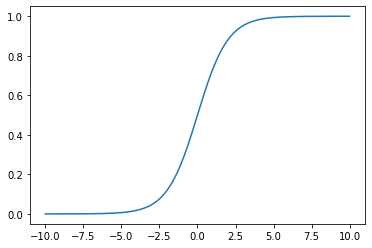

In [12]:
x = (np.linspace(-10, 10, num=1000))
s = Sigmoid()
a = s(x).tolist()

plt.plot(x, a[0])

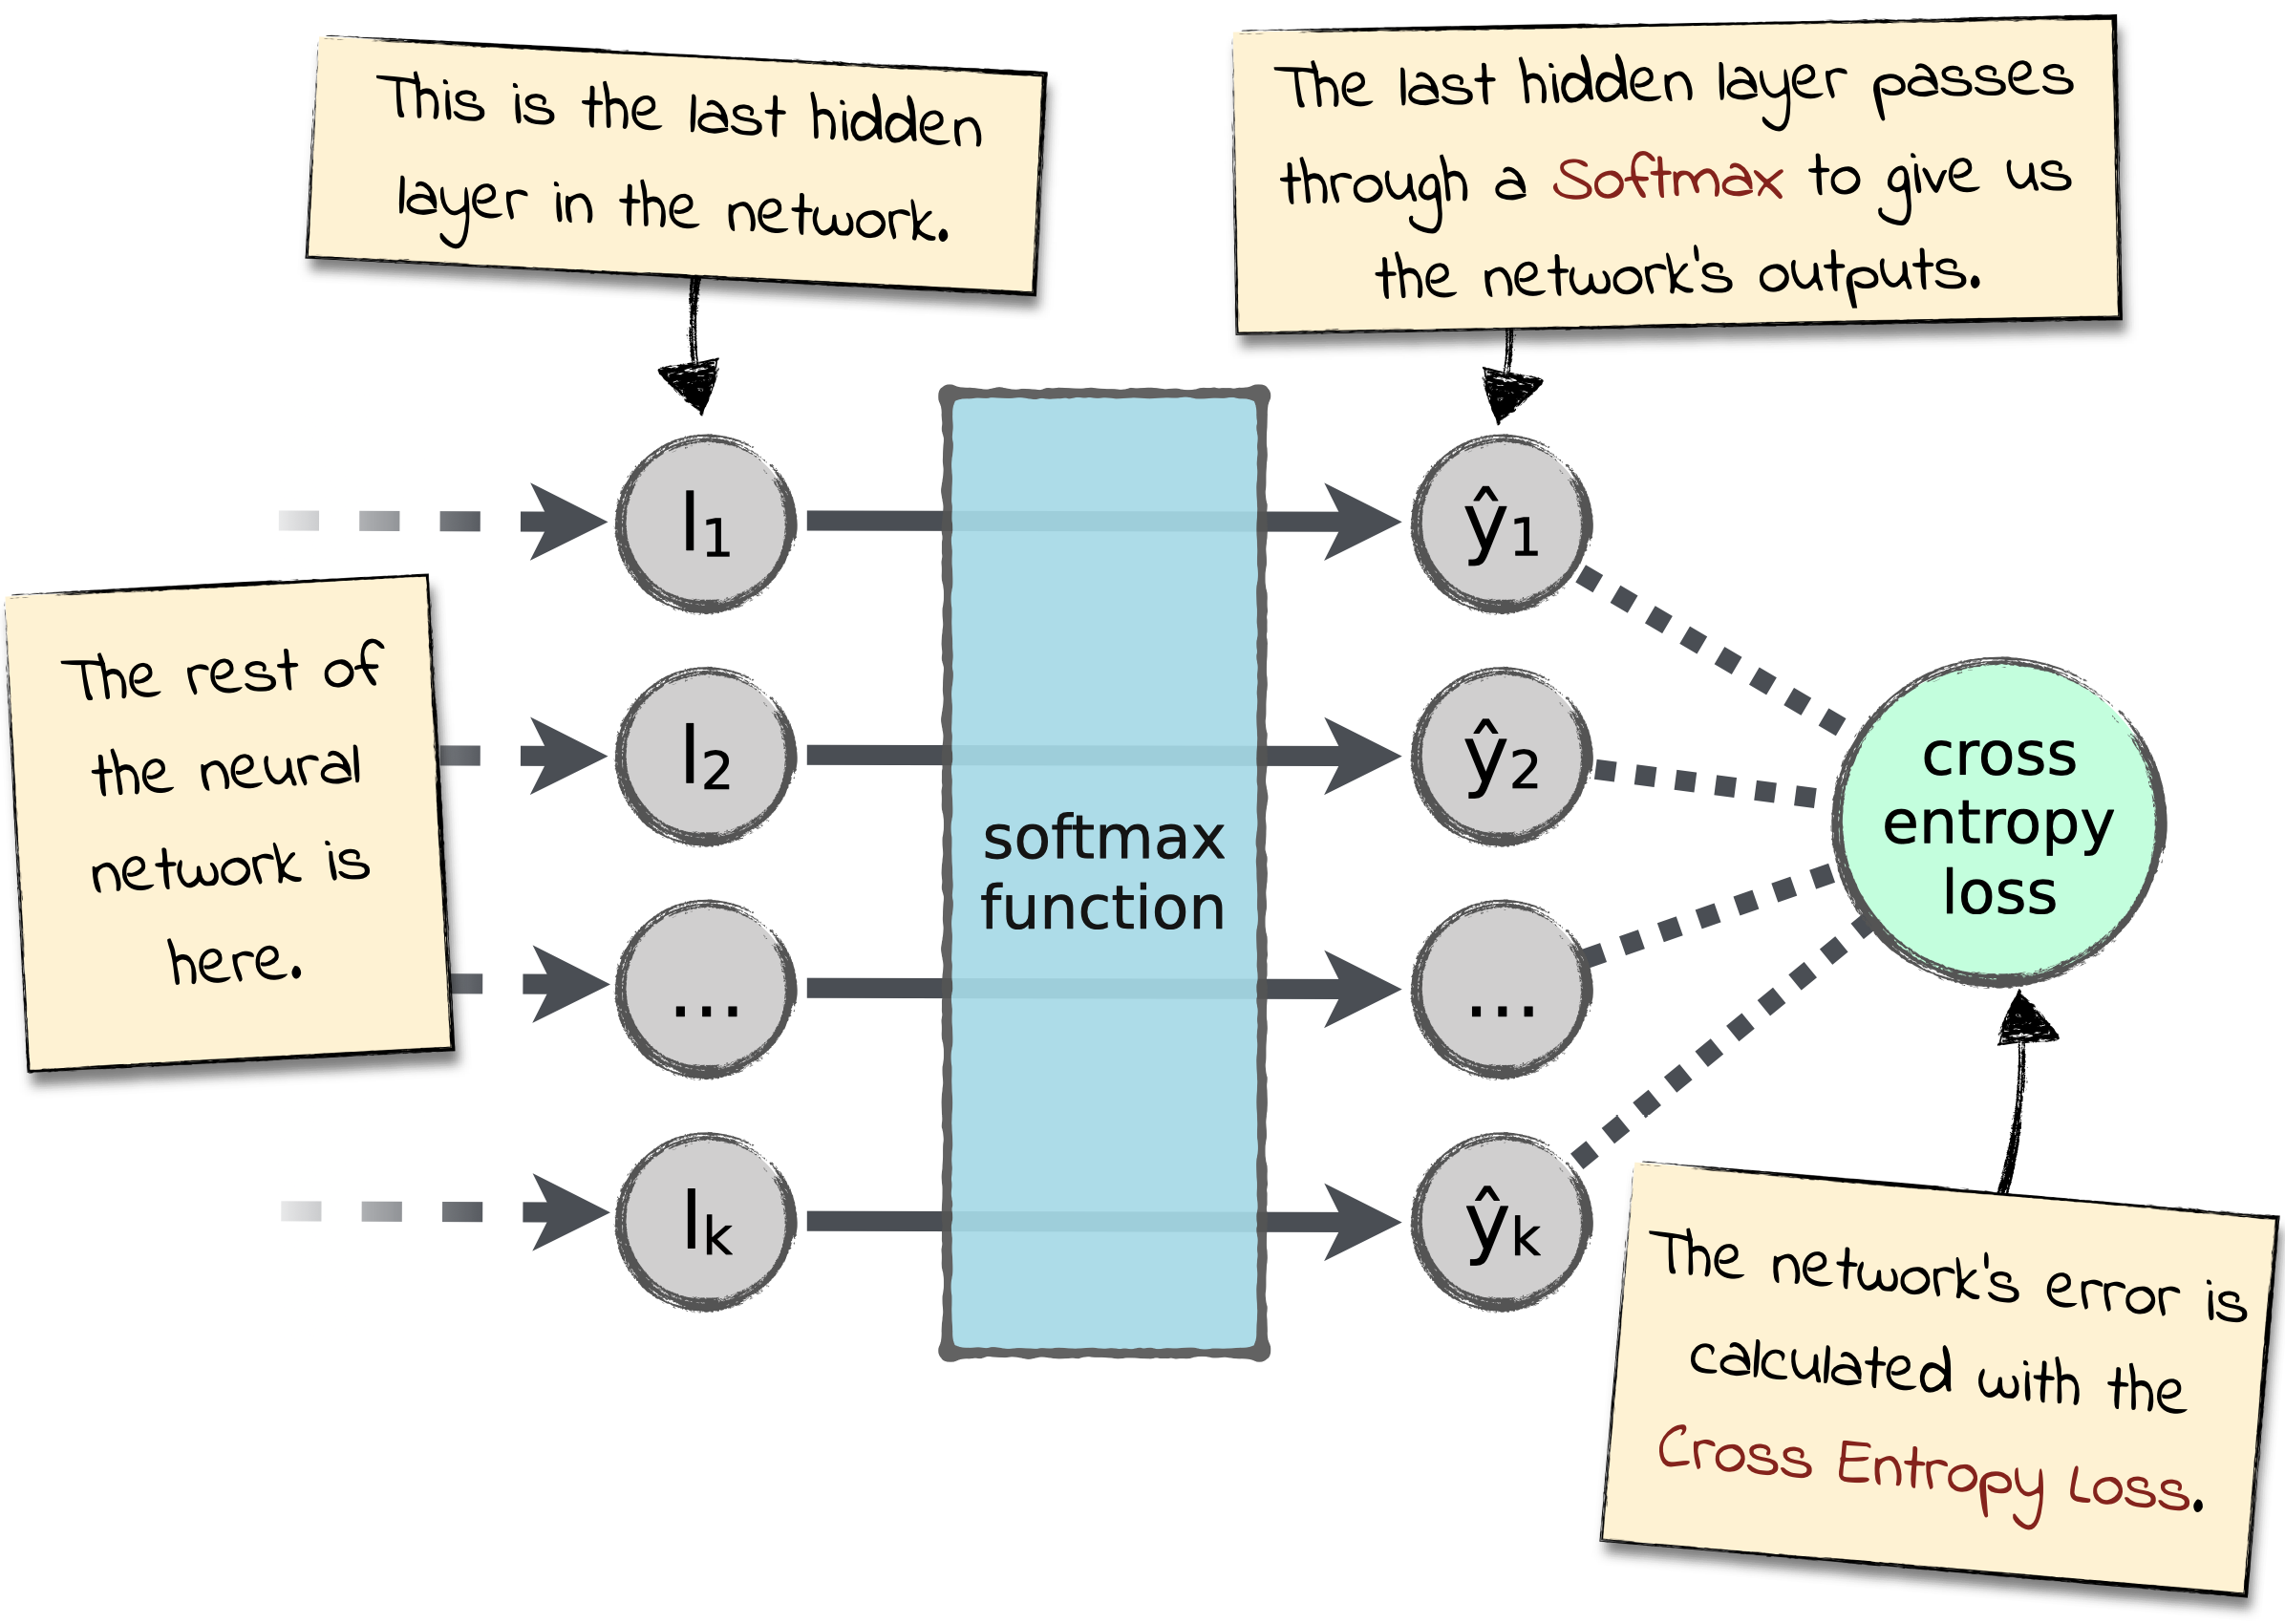

# Loss Function

In [30]:
class CrossEntropy: #(with softmax)
    def __init__(self): 
        pass

    def __val(self, true_val, expected_val):
        #L(y^, y) = - Σ (y^(k)log (y^)^(k)) for k in K
        assert np.shape(true_val)==np.shape(expected_val)
        expected_val_mat = np.matrix(expected_val, dtype=float)
        S = Softmax()
        cross_entropy_value = np.sum(-np.multiply(expected_val_mat, np.log(S(true_val))), axis=1)
        return cross_entropy_value
        
    def derivative(self, true_val, expected_val):
        assert np.shape(true_val)==np.shape(expected_val)
        S = Softmax()
        cross_entropy_derivative = S(true_val) - expected_val 
        return cross_entropy_derivative
    
    def __call__(self, true_val, expected_val):
        return self.__val(true_val, expected_val)

<div style="direction:rtl"> تابع cross intropy با همان منطق ذکر شده نوشته شد. </div>

# Layer

In [31]:
class Layer:

    DEFAULT_LOW, DEFAULT_HIGH, DEFAULT_MEAN, DEFAULT_VAR = 0, 0.05, 0., 1.
  
    def __init__(self, input_size, output_size, activation=Identical(), initial_weight='uniform', 
                 **initializing_parameters):
        assert type(initial_weight)==str, 'Undefined activation function!'
        
        self.__weight_initializer_dict = {'uniform':self.__uniform_weight, 'normal':self.__normal_weight}
        
        assert initial_weight in self.__weight_initializer_dict, 'Undefined weight initialization function!'

        self.__n_neurons = output_size
        weight_initializer = self.__weight_initializer_dict[initial_weight]
        self.__weight = weight_initializer(input_size, self.__n_neurons, **initializing_parameters)
        self.__bias = weight_initializer(1, self.__n_neurons, **initializing_parameters)

        self.__activation = activation
        
        self.__last_input = None
        self.__last_activation_input = None
        self.__last_activation_output = None
        self.__last_activation_derivative = None
        
    def forward(self, layer_input):
        assert np.ndim(layer_input)==2
        assert np.size(self.__weight,0) == np.size(layer_input,1)

        self.__last_input = layer_input
        self.__last_activation_input = np.matmul(layer_input, self.__weight) + self.__bias
        self.__last_activation_output = self.activation(self.__last_activation_input)
        self.__last_activation_derivative = self.__activation.derivative(self.__last_activation_output)
        return self.__last_activation_output
    
    def update_weights(self, backprop_tensor, lr):
        assert np.ndim(backprop_tensor)==2
        assert np.size(backprop_tensor,0) == np.size(self.__last_activation_derivative,0)
        assert np.size(backprop_tensor,1) == self.__n_neurons

        DError = self.__last_input.transpose()
        errorY = np.multiply(backprop_tensor, self.__last_activation_derivative)
        backprop_tensor = np.matmul(errorY, self.__weight.transpose())
        self.__bias -= np.matmul(np.matrix(np.tile(1, (1, errorY.shape[0]))),errorY)*lr
        self.__weight -= np.matmul(DError,errorY)*lr

        return backprop_tensor


    def __uniform_weight(self, dim1, dim2, **initializing_parameters):
        low, high = self.DEFAULT_LOW, self.DEFAULT_HIGH
        if 'low' in initializing_parameters.keys(): low = initializing_parameters['low']
        if 'high' in initializing_parameters.keys(): high = initializing_parameters['high']
        weights = np.matrix(np.random.uniform(low = low, high = high, size = (dim1, dim2)), dtype = float)
        return weights

    def __normal_weight(self, dim1, dim2, **initializing_parameters):
        mean, var = self.DEFAULT_MEAN, self.DEFAULT_VAR
        if 'mean' in initializing_parameters.keys(): mean = initializing_parameters['mean']
        if 'var' in initializing_parameters.keys(): var = initializing_parameters['var']
        weights = np.matrix(np.random.normal(mean, np.sqrt(var), size=(dim1, dim2)), dtype = float)
        return weights
    
    @property
    def n_neurons(self): return self.__n_neurons
    
    @property
    def weight(self): return self.__weight
    
    @property
    def bias(self): return self.__bias
    
    @property
    def activation(self): return self.__activation

<div style="direction:rtl"> توابع قسمت بالا تکمیل شد. </div>

# Feed Forward Neural Network

In [15]:
class FeedForwardNN:
    def __init__(self, input_shape):       
        self.__input_shape = input_shape
        self.__output_shape = None
        self.__layers_list = []
        self.__lr = None
        self.__loss = None
        
    def add_layer(self, n_neurons, activation=Relu(), initial_weight='uniform', **initializing_parameters):
        assert type(n_neurons)==int, "Invalid number of neurons for the layer!"
        assert n_neurons>0, "Invalid number of neurons for the layer!"
        
        n_prev_neurons = self.__input_shape if len(self.__layers_list)==0 else self.__layers_list[-1].n_neurons
        new_layer = Layer(n_prev_neurons, n_neurons, activation, initial_weight, **initializing_parameters)
        self.__layers_list.append(new_layer)
        self.__output_shape = self.__layers_list[-1].n_neurons 
    
    def set_training_param(self, loss=CrossEntropy(), lr=1e-3):
        assert self.__layers_list, "Uncomplete model!"
        self.__loss = loss
        self.__lr = lr
    
    def forward(self, network_input):
        network_output = network_input
        for i in range(len(self.__layers_list)):
            network_output = self.__layers_list[i].forward(network_output)

        return network_output
    
    def fit(self, epochs, trainloader, testloader=None, print_results=True):        
        assert type(self.__output_shape) != None, "Model is not compiled!"
        assert type(self.__lr) != None and type(self.__loss) != None, "Training paramenters are not set!"

        log = {"train_accuracy":[], "train_loss":[], "test_accuracy":[], "test_loss":[]}
        
        for epoch in range(1, epochs+1):
            
            if print_results: 
                print('Epoch {}:'.format(epoch)) 
            average_accuracy, average_loss = self.__train(trainloader)
            log['train_accuracy'].append(average_accuracy)
            log['train_loss'].append(average_loss)
            if print_results:
                print('\tTrain: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
            
            if type(testloader) != type(None):
                average_accuracy, average_loss = self.__test(testloader)
                log['test_accuracy'].append(average_accuracy)
                log['test_loss'].append(average_loss)
                if print_results:
                    print('\tTest: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
                    
        return log
    
    def __train(self, trainloader):
        bach_accuracies, batch_losses = [], []
        for x_train, y_train in trainloader:
            batch_accuracy, batch_loss = self.__train_on_batch(x_train, y_train)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)
    
    def __test(self, testloader):
        bach_accuracies, batch_losses = [], []
        for x_test, y_test in testloader:
            batch_accuracy, batch_loss = self.__test_on_batch(x_test, y_test)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)
    
    def __train_on_batch(self, x_batch, y_batch):
        out = self.forward(x_batch)
        self.__update_weights(out, y_batch)
        return (self.__compute_accuracy(out, y_batch), np.mean(self.__loss(out, y_batch)))    
        
    def __test_on_batch(self, x_batch, y_batch):
        out = self.forward(x_batch)
        return (self.__compute_accuracy(out, y_batch), np.mean(self.__loss(out, y_batch)))       
        
    def __get_labels(self, outputs):
        labels = np.argmax(outputs, axis = 1)
        return labels
    
    def __compute_accuracy(self, output, expected_output):
        true_detected = 0
        for i in range(len(output)):
            if self.__get_labels(output[i]) == self.__get_labels(expected_output[i]):
                true_detected += 1
        
        accuracy = true_detected/len(output)
        return accuracy*100
    
    def __update_weights(self, output, y_train):
        length = len(self.__layers_list)
        backPro = self.__layers_list[length-1].update_weights(self.__loss.derivative(output, y_train), self.__lr)
        for i in reversed(range(length-1)):
            backPro = self.__layers_list[i].update_weights(backPro, self.__lr)
        return

<div style="direction:rtl"> توابع قسمت بالا تکمیل شد. </div>

### part 3

# Training Sample Code

### section 1

In [16]:
# Sample code for building and training a model
n = 2
INPUT_SHAPE = 1024
LEARNING_RATE = 1e-3
EPOCHS = 25

TRAINLOADER = Dataloader(ax_train_df, ax_y_train, n, 32)
TESTLOADER = Dataloader(ax_test_df, ax_y_test, n, 32)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(200, input_shape=INPUT_SHAPE, activation=Relu(), initial_weight='uniform')
network.add_layer(2, activation=Identical(), initial_weight='uniform')

network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:


C:\Users\N.GH\AppData\Local\Temp/ipykernel_5824/2886361488.py:9: RuntimeWarning: divide by zero encountered in log
  cross_entropy_value = np.sum(-np.multiply(np.matrix(expected_val, dtype=float),np.log(S(true_val))), axis=1)
C:\Users\N.GH\AppData\Local\Temp/ipykernel_5824/2886361488.py:9: RuntimeWarning: invalid value encountered in multiply
  cross_entropy_value = np.sum(-np.multiply(np.matrix(expected_val, dtype=float),np.log(S(true_val))), axis=1)


	Train: Average Accuracy: 54.41400304414004	Average Loss: nan
	Test: Average Accuracy: 62.400265957446805	Average Loss: 0.6549808973302425
Epoch 2:
	Train: Average Accuracy: 61.45357686453576	Average Loss: 0.6586471315283484
	Test: Average Accuracy: 64.3395390070922	Average Loss: 0.6342062410506099
Epoch 3:
	Train: Average Accuracy: 64.04109589041096	Average Loss: 0.6371306646836575
	Test: Average Accuracy: 66.47828014184397	Average Loss: 0.6137406339817136
Epoch 4:
	Train: Average Accuracy: 66.12442922374429	Average Loss: 0.6137124900820828
	Test: Average Accuracy: 68.76108156028369	Average Loss: 0.590441546782229
Epoch 5:
	Train: Average Accuracy: 68.77853881278538	Average Loss: 0.5899076324180803
	Test: Average Accuracy: 70.80008865248227	Average Loss: 0.5690759744861555
Epoch 6:
	Train: Average Accuracy: 70.71917808219177	Average Loss: 0.5699911289754672
	Test: Average Accuracy: 72.22960992907801	Average Loss: 0.5547007773602525
Epoch 7:
	Train: Average Accuracy: 71.6181506849315	A

### section 2 - weights

<div style="direction:rtl"> مقدار دهی اولیه صفر به وزن ها </div>

<div style="direction:rtl"> اگر مجموعه ای از وزن‌ها را در شبکه عصبی صفر کنیم، در این صورت تمام سلول های عصبی در هر لایه شروع به تولید همان خروجی و شیب های یکسان می کنند. در نتیجه، شبکه عصبی به هیچ وجه نمی تواند چیزی یاد بگیرد زیرا هیچ منبع عدم تقارن بین نورون‌‎های مختلف وجود ندارد. بنابراین، ما هنگام مقدار دهی اولیه وزنها در شبکه های عصبی، تصادفی بودن را اضافه می کنیم. </div>

### section 3 - learning rate

<div style="direction:rtl"> نرخ یادگیری یک هایپرپارامتر است که هر بار که وزن‌های مدل به‌روزرسانی می‌شوند، میزان تغییر مدل را در پاسخ به خطای تخمینی کنترل می‌کند. </div>

<div style="direction:rtl"> وقتی ما نرخ یادگیری را پایین می آوریم دقتمان کاهش پیدا می کند و وقتی آن را زیاد میکنیم مشاهده میشود که عملکرد تابع رلو کم می شود. </div>

<div style="direction:rtl"> در کل اگر نرخ یادگیری خیلی پایین تنظیم شود، آموزش مدل بسیار آهسته ادامه خواهد یافت زیرا ما در وزن ها تغییرات بسیار کوچکی ایجاد می کنیم ، زیرا اندازه گام ما که تحت معادله گرادیان نزولی کنترل می شود کم می باشد. ممکن است قبل از رسیدن به حداقل خطا، تکرارهای زیادی طول بکشد. و همچنین ریسک همگرایی در میینموم محلی بالا میرود.
اگر نرخ یادگیری بیش از حد بالا تنظیم شود، این امر باعث عملکرد واگرایی نامطلوب در تابع خطا به دلیل تغییرات زیاد در وزن ها و همچنین به دلیل مقدار بزرگتر اندازه گام می شود. ممکن است همگرا نشود (مدل می تواند خروجی خوبی بدهد) یا حتی واگرایی کند (داده ها برای آموزش شبکه بسیار آشفته هستند). </div>

<div style="direction:rtl"> برای ادامه کار از همان نرخ یادگیری 0.001 استفاده خواهد شد </div>

learning rate = 0.0001

In [17]:
n = 2
INPUT_SHAPE = 1024
LEARNING_RATE = 1e-4
EPOCHS = 25

TRAINLOADER = Dataloader(ax_train_df, ax_y_train, n, 32)
TESTLOADER = Dataloader(ax_test_df, ax_y_test, n, 32)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(200, input_shape=INPUT_SHAPE, activation=Relu(), initial_weight='uniform')
network.add_layer(2, activation=Identical(), initial_weight='uniform')

network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 49.11529680365297	Average Loss: 22.340828390399558
	Test: Average Accuracy: 49.202127659574465	Average Loss: 27.925100768737952
Epoch 2:
	Train: Average Accuracy: 49.257990867579906	Average Loss: 16.758582577264452
	Test: Average Accuracy: 49.202127659574465	Average Loss: 13.760116402157706
Epoch 3:
	Train: Average Accuracy: 48.48744292237443	Average Loss: 12.925326852882584
	Test: Average Accuracy: 49.202127659574465	Average Loss: 4.822287789451965
Epoch 4:
	Train: Average Accuracy: 49.82876712328767	Average Loss: 9.145219657938181
	Test: Average Accuracy: 57.8125	Average Loss: 0.6751708182993538
Epoch 5:
	Train: Average Accuracy: 50.87043378995434	Average Loss: 6.846435404566111
	Test: Average Accuracy: 49.10239361702128	Average Loss: 0.9763364520615014
Epoch 6:
	Train: Average Accuracy: 51.29851598173516	Average Loss: 5.038640612719072
	Test: Average Accuracy: 50.797872340425535	Average Loss: 4.584426282795248
Epoch 7:
	Train: Average Accuracy: 51.

learning rate = 0.01

In [19]:
n = 2
INPUT_SHAPE = 1024
LEARNING_RATE = 1e-2
EPOCHS = 25

TRAINLOADER = Dataloader(ax_train_df, ax_y_train, n, 32)
TESTLOADER = Dataloader(ax_test_df, ax_y_test, n, 32)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(200, input_shape=INPUT_SHAPE, activation=Relu(), initial_weight='uniform')
network.add_layer(2, activation=Identical(), initial_weight='uniform')

network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:


C:\Users\N.GH\AppData\Local\Temp/ipykernel_2324/2886361488.py:9: RuntimeWarning: divide by zero encountered in log
  cross_entropy_value = np.sum(-np.multiply(np.matrix(expected_val, dtype=float),np.log(S(true_val))), axis=1)
C:\Users\N.GH\AppData\Local\Temp/ipykernel_2324/2886361488.py:9: RuntimeWarning: invalid value encountered in multiply
  cross_entropy_value = np.sum(-np.multiply(np.matrix(expected_val, dtype=float),np.log(S(true_val))), axis=1)


	Train: Average Accuracy: 49.92389649923896	Average Loss: nan
	Test: Average Accuracy: 49.66755319148936	Average Loss: 0.6974240448231812
Epoch 2:
	Train: Average Accuracy: 49.72412480974124	Average Loss: 0.6943391422173204
	Test: Average Accuracy: 49.66755319148936	Average Loss: 0.6974240448231812
Epoch 3:
	Train: Average Accuracy: 49.72412480974124	Average Loss: 0.6943391422173204
	Test: Average Accuracy: 49.66755319148936	Average Loss: 0.6974240448231812
Epoch 4:
	Train: Average Accuracy: 49.72412480974124	Average Loss: 0.6943391422173204
	Test: Average Accuracy: 49.66755319148936	Average Loss: 0.6974240448231812
Epoch 5:
	Train: Average Accuracy: 49.72412480974124	Average Loss: 0.6943391422173204
	Test: Average Accuracy: 49.66755319148936	Average Loss: 0.6974240448231812
Epoch 6:
	Train: Average Accuracy: 49.72412480974124	Average Loss: 0.6943391422173204
	Test: Average Accuracy: 49.66755319148936	Average Loss: 0.6974240448231812
Epoch 7:
	Train: Average Accuracy: 49.72412480974124

### section 4 - activation function

<div style="direction:rtl"> در این قسمت برای آموزش شبکه از سیگموید و tanh و leaky relu استفاده میکنیم </div>

sigmoid

In [24]:
n = 2
INPUT_SHAPE = 1024
LEARNING_RATE = 1e-3
EPOCHS = 25

TRAINLOADER = Dataloader(ax_train_df, ax_y_train, n, 32)
TESTLOADER = Dataloader(ax_test_df, ax_y_test, n, 32)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(200, input_shape=INPUT_SHAPE, activation= Sigmoid(), initial_weight='uniform')
network.add_layer(2, activation=Identical(), initial_weight='uniform')

network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 50.77054794520548	Average Loss: 1.2930812162164749
	Test: Average Accuracy: 49.202127659574465	Average Loss: 0.7227635704650516
Epoch 2:
	Train: Average Accuracy: 50.742009132420094	Average Loss: 1.3014357760738138
	Test: Average Accuracy: 49.202127659574465	Average Loss: 0.7218494116832518
Epoch 3:
	Train: Average Accuracy: 50.68493150684932	Average Loss: 1.2978585964543035
	Test: Average Accuracy: 49.202127659574465	Average Loss: 0.7194881932510246
Epoch 4:
	Train: Average Accuracy: 50.79908675799087	Average Loss: 1.2862325924427538
	Test: Average Accuracy: 49.202127659574465	Average Loss: 0.7139541803235594
Epoch 5:
	Train: Average Accuracy: 50.513698630136986	Average Loss: 1.2709737082729489
	Test: Average Accuracy: 49.202127659574465	Average Loss: 0.704405798457037
Epoch 6:
	Train: Average Accuracy: 50.271118721461185	Average Loss: 1.2055125700747917
	Test: Average Accuracy: 49.202127659574465	Average Loss: 0.6990487992140966
Epoch 7:
	Train: Ave

tanh

In [25]:
n = 2
INPUT_SHAPE = 1024
LEARNING_RATE = 1e-3
EPOCHS = 25

TRAINLOADER = Dataloader(ax_train_df, ax_y_train, n, 32)
TESTLOADER = Dataloader(ax_test_df, ax_y_test, n, 32)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(200, input_shape=INPUT_SHAPE, activation= Tanh(), initial_weight='uniform')
network.add_layer(2, activation=Identical(), initial_weight='uniform')

network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 51.08447488584475	Average Loss: 1.274199767003876
	Test: Average Accuracy: 49.202127659574465	Average Loss: 0.723321178650531
Epoch 2:
	Train: Average Accuracy: 50.742009132420094	Average Loss: 1.3033870331200008
	Test: Average Accuracy: 49.202127659574465	Average Loss: 0.7225610114452248
Epoch 3:
	Train: Average Accuracy: 50.37100456621005	Average Loss: 1.2855805778764395
	Test: Average Accuracy: 48.57047872340426	Average Loss: 0.6964877167846067
Epoch 4:
	Train: Average Accuracy: 51.71232876712329	Average Loss: 0.8906701224837111
	Test: Average Accuracy: 61.003989361702125	Average Loss: 0.663328149757713
Epoch 5:
	Train: Average Accuracy: 58.63774733637748	Average Loss: 0.6776213657358634
	Test: Average Accuracy: 63.17597517730497	Average Loss: 0.6424641050433563
Epoch 6:
	Train: Average Accuracy: 62.338280060882795	Average Loss: 0.6542443897971836
	Test: Average Accuracy: 64.26196808510639	Average Loss: 0.6333842815189543
Epoch 7:
	Train: Average A

<div style="direction:rtl"> با استفاده از دو تابع بالا عملکرد شبکه و دقت آن کاهش یافت. </div>

<div style="direction:rtl"> علت این که از توابع سیگموید و تانژانت هایپربولیک استفاده نمیکنیم: </div>

<div style="direction:rtl"> این توابع برای مقادیر خیلی بزرگ و یا خیلی کوچک تغییر محسوسی نمیکنند و عملا مقدار gradient محلی به قدری کوچک می شود که حساسیت به خروجی کم میشود و یادگیری شبکه اتفاق نمی افتد. اصطلاحا به این مشکل vanishing gradient گفته میشود. </div>

<div style="direction:rtl"> در کل استفاده از تابع relu در اولویت میباشد زیرا مشتقش مشکل بالا را ندارد و همچنین هزینه محاسباتی آن نیز کم است </div>

leaky relu

In [27]:
n = 2
INPUT_SHAPE = 1024
LEARNING_RATE = 1e-3
EPOCHS = 25

TRAINLOADER = Dataloader(ax_train_df, ax_y_train, n, 32)
TESTLOADER = Dataloader(ax_test_df, ax_y_test, n, 32)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(200, input_shape=INPUT_SHAPE, activation= LeakyRelu(), initial_weight='uniform')
network.add_layer(2, activation=Identical(), initial_weight='uniform')

network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:


C:\Users\N.GH\AppData\Local\Temp/ipykernel_5824/2886361488.py:9: RuntimeWarning: divide by zero encountered in log
  cross_entropy_value = np.sum(-np.multiply(np.matrix(expected_val, dtype=float),np.log(S(true_val))), axis=1)
C:\Users\N.GH\AppData\Local\Temp/ipykernel_5824/2886361488.py:9: RuntimeWarning: invalid value encountered in multiply
  cross_entropy_value = np.sum(-np.multiply(np.matrix(expected_val, dtype=float),np.log(S(true_val))), axis=1)


	Train: Average Accuracy: 54.51388888888889	Average Loss: nan
	Test: Average Accuracy: 61.99024822695035	Average Loss: 0.6566080806115264
Epoch 2:
	Train: Average Accuracy: 61.22526636225266	Average Loss: 0.6587375657880461
	Test: Average Accuracy: 64.77171985815603	Average Loss: 0.6346393547145718
Epoch 3:
	Train: Average Accuracy: 63.79375951293759	Average Loss: 0.6375545555743896
	Test: Average Accuracy: 66.54476950354609	Average Loss: 0.6155082246251756
Epoch 4:
	Train: Average Accuracy: 65.79623287671232	Average Loss: 0.6170003758424851
	Test: Average Accuracy: 68.27349290780141	Average Loss: 0.5958849166360667
Epoch 5:
	Train: Average Accuracy: 67.92237442922375	Average Loss: 0.5968228211796228
	Test: Average Accuracy: 69.24867021276596	Average Loss: 0.5758444269925788
Epoch 6:
	Train: Average Accuracy: 69.40639269406392	Average Loss: 0.5790179703603748
	Test: Average Accuracy: 70.36790780141844	Average Loss: 0.5621228002375047
Epoch 7:
	Train: Average Accuracy: 70.71917808219177

<div style="direction:rtl"> علت برتری leaky relu به relu </div>

<div style="direction:rtl"> در فرمول مشتق رلو مشاهده میشود که اگر مقدار value مثبت باشد خروجی یک میشود و در غیر این صورت صفر میشود  </div>
<div style="direction:rtl"> این بدین معناست که وقتی مقدار منفی باشد هیچ یادگیری اتفاق نمی افتد زیرا که مقدار مشتق صفر می باشد. به این پدیده DEAD relu  گفته می شود. </div>

<div style="direction:rtl"> برای این که از این پدیده جلوگیری شود تابع leaky relu تعریف شده است. مشتق این تابع یک مقدار خیلی کوچک به مقادیر کوچکتر از صفر نسبت می دهد در نتیجه یک یادگیریی در مقادیر کوچکتر از صفر انجام می شود. </div>


### section 5 - batch size

batch size = 16

In [28]:
n = 2
INPUT_SHAPE = 1024
LEARNING_RATE = 1e-3
EPOCHS = 25

TRAINLOADER = Dataloader(ax_train_df, ax_y_train, n, 16)
TESTLOADER = Dataloader(ax_test_df, ax_y_test, n, 16)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(200, input_shape=INPUT_SHAPE, activation= LeakyRelu(), initial_weight='uniform')
network.add_layer(2, activation=Identical(), initial_weight='uniform')

network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 51.78367579908676	Average Loss: 9.648069111898216
	Test: Average Accuracy: 58.045212765957444	Average Loss: 0.668837632091637
Epoch 2:
	Train: Average Accuracy: 60.24543378995434	Average Loss: 0.6645151920363773
	Test: Average Accuracy: 62.66622340425532	Average Loss: 0.6410395110542361
Epoch 3:
	Train: Average Accuracy: 63.34189497716895	Average Loss: 0.641562232197009
	Test: Average Accuracy: 64.39494680851064	Average Loss: 0.6265614752518109
Epoch 4:
	Train: Average Accuracy: 65.52511415525115	Average Loss: 0.6217189677977835
	Test: Average Accuracy: 66.68882978723404	Average Loss: 0.6082018061794354
Epoch 5:
	Train: Average Accuracy: 67.42294520547945	Average Loss: 0.6001978822173779
	Test: Average Accuracy: 68.75	Average Loss: 0.5886108880687511
Epoch 6:
	Train: Average Accuracy: 69.33504566210046	Average Loss: 0.580501840933154
	Test: Average Accuracy: 69.54787234042553	Average Loss: 0.5762246419472619
Epoch 7:
	Train: Average Accuracy: 70.57648

batch size = 256

In [29]:
n = 2
INPUT_SHAPE = 1024
LEARNING_RATE = 1e-3
EPOCHS = 25

TRAINLOADER = Dataloader(ax_train_df, ax_y_train, n, 256)
TESTLOADER = Dataloader(ax_test_df, ax_y_test, n, 256)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(200, input_shape=INPUT_SHAPE, activation= LeakyRelu(), initial_weight='uniform')
network.add_layer(2, activation=Identical(), initial_weight='uniform')

network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:


C:\Users\N.GH\AppData\Local\Temp/ipykernel_5824/2886361488.py:9: RuntimeWarning: divide by zero encountered in log
  cross_entropy_value = np.sum(-np.multiply(np.matrix(expected_val, dtype=float),np.log(S(true_val))), axis=1)
C:\Users\N.GH\AppData\Local\Temp/ipykernel_5824/2886361488.py:9: RuntimeWarning: invalid value encountered in multiply
  cross_entropy_value = np.sum(-np.multiply(np.matrix(expected_val, dtype=float),np.log(S(true_val))), axis=1)


	Train: Average Accuracy: 49.892197646103895	Average Loss: nan
	Test: Average Accuracy: 50.79398777173913	Average Loss: 1.5262043974751727
Epoch 2:
	Train: Average Accuracy: 49.892197646103895	Average Loss: 7.539193336432561
	Test: Average Accuracy: 50.79398777173913	Average Loss: 1.473955391750054
Epoch 3:
	Train: Average Accuracy: 49.892197646103895	Average Loss: 7.398621441393024
	Test: Average Accuracy: 50.79398777173913	Average Loss: 1.2387716120472032
Epoch 4:
	Train: Average Accuracy: 49.892197646103895	Average Loss: 7.295628820610198
	Test: Average Accuracy: 53.66423233695652	Average Loss: 0.7048353330373729
Epoch 5:
	Train: Average Accuracy: 50.05960836038961	Average Loss: 6.842369912572772
	Test: Average Accuracy: 50.859091938405804	Average Loss: 1.3937261118713773
Epoch 6:
	Train: Average Accuracy: 49.892197646103895	Average Loss: 6.978648427597318
	Test: Average Accuracy: 50.911458333333336	Average Loss: 0.9122180236185976
Epoch 7:
	Train: Average Accuracy: 49.8642958603896

<div style="direction:rtl"> مقدار batch  16 دقت بالاتری را دارد و batch 256 دقت کمتری را داراست. </div>

<div style="direction:rtl">  علت این اتفاق این است که سرعت رسیدن به دقت مورد نظر در بچ سایزهای کوچک بیشتر است ولی سرعت محاسبات بچ سایزهای بزرگتر بیشتر است.</div>

<div style="direction:rtl">  ما به دلیل مشکل محاسبات زیاد قادر به انتقال یکباره مجموعه داده به شبکه عصبی نیستیم، بنابراین مجموعه داده را به چند دسته تقسیم می کنیم.این کار باعث این می شود که سرعت محاسبات ما بالا رود و استفاده از مموری کاهش یابد،زیرا دیگر لازم نیست تمام ارورهای داده ها را در حافظه ذخیره بکنیم.  </div>

<div style="direction:rtl"> اگر مقدار batch خیلی بزرگ باشد باز هم همان مشکل زمان گیر بودن ذخیره در حافظه را داریم و اگر خیلی کوچک باشد شاید به دقت خوبی دست پیدا کنیم ولی عملا سربار محاسباتی که ایجاد میکند دردسر ساز خواهد بود پس باید یک مقدار متناسب انتخاب شود. </div>


<div style="direction:rtl"> نتیجه گیری کلی: در این پروژه ما نحوه یادگیری شبکه عصبی را یاد گرفتیم و تاثیر هایپرپارامترهایی چون نرخ یادگیری، تابع فعالسازی، سایز بسته و ... را یاد گرفتیم. مقدار نرخ یادگیری نه باید خیلی کم باشد و نه خیلی زیاد باشد. همچنین تابع فعالسازی بهتر است که relu و یا leaky relu باشد و سایز بسته نیز اگر به مقدار متعادلی کوچک باشد بهتر است. منظور از مقدار متعادل است این که بسته بندی داده ها خود هزینه مضاعف تری نسبت به حالت اصلی پیدا نکند. </div>


refrences:

https://www.youtube.com/watch?v=tIeHLnjs5U8

https://www.quora.com/What-are-the-advantages-of-using-Leaky-Rectified-Linear-Units-Leaky-ReLU-over-normal-ReLU-in-deep-learning

https://stats.stackexchange.com/questions/153531/what-is-batch-size-in-neural-network

https://medium.com/analytics-vidhya/when-and-why-are-batches-used-in-machine-learning-acda4eb00763

https://medium.com/analytics-vidhya/when-and-why-are-batches-used-in-machine-learning-acda4eb00763

https://stats.stackexchange.com/questions/153531/what-is-batch-size-in-neural-network

https://onlinebme.com/neural-network-interview-questions-%D8%B4%D8%A8%DA%A9%D9%87-%D8%B9%D8%B5%D8%A8%DB%8C/

https://shahaab-co.com/mag/edu/deep-learning/initialize-weights-in-a-neural-networks-part-one/



<div style="direction:rtl"> پیشنهاد: پروژه سختی بود. بنظرم جا داشت نوشتن بخش های آسانتری به ما محول شود و دیباگ آن هم مشکل بود. 
از زحمات شما بابت این پروژه متشکرم </div>